In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import os
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course\misc
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course


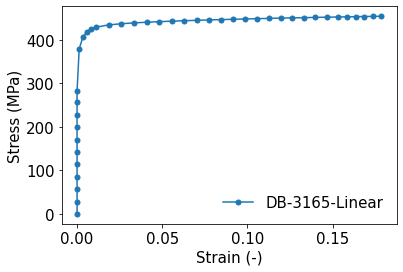

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

npyfile = np.load(f'targets/RVE_1_40_D/DB/linear_uniaxial_RD/DB1_process.npy', allow_pickle=True).tolist()
stress = npyfile["stress"]
strain = npyfile["strain"]

size = 15

figure(figsize=(6, 4))

plt.plot(strain, stress * 1e-6, label = f"DB-3165-Linear", marker='.', markersize=10)

plt.title(f"", size=size + 2)
plt.rc('xtick', labelsize=size)    
plt.rc('ytick', labelsize=size)  
#plt.ylim([80, 310])
#plt.xlim([0, 0.2])
plt.ylabel('Stress (MPa)', size=size)
plt.xlabel("Strain (-)", size=size)
plt.legend(loc=4, frameon=False, fontsize=size , ncol=1)

In [8]:
params1 = pd.read_excel(f"DB_RVE_14_0_D_converging_params.xlsx" , skiprows= 8, nrows=30, usecols = "A:F").to_numpy()
params2 = pd.read_excel(f"DB_RVE_14_0_D_converging_params.xlsx" , skiprows= 8, nrows=60, usecols = "H:M").to_numpy()
params3 = pd.read_excel(f"DB_RVE_14_0_D_converging_params.xlsx" , skiprows= 8, nrows=30, usecols = "O:T").to_numpy()
np.save(f'DB1.npy', params1)
np.save(f'DB2.npy', params2)
np.save(f'DB3.npy', params3)
# To use them, copy these part to convert them to a list of tuples
# manualParams1 = np.load(f'DB1.npy', allow_pickle=True)
# print(manualParams1)
manualParams2 = np.load(f'DB2.npy', allow_pickle=True)
print(manualParams2)
# manualParams3 = np.load(f'DB3.npy', allow_pickle=True)
# print(manualParams3)

[[7.90e-01 7.50e+01 8.60e-01 1.50e-01 1.80e+00 2.10e+00]
 [3.20e-01 5.40e+01 7.10e-01 1.30e-01 1.95e+00 1.40e+00]
 [9.00e-01 9.10e+01 2.70e-01 3.10e-01 1.85e+00 2.50e+00]
 [8.80e-01 5.80e+01 1.30e-01 1.30e-01 1.65e+00 2.45e+00]
 [7.30e-01 9.70e+01 5.20e-01 1.40e-01 1.45e+00 1.20e+00]
 [6.70e-01 5.60e+01 3.30e-01 2.00e-01 2.00e+00 1.70e+00]
 [3.50e-01 9.10e+01 2.40e-01 3.30e-01 1.60e+00 2.95e+00]
 [8.20e-01 5.20e+01 7.00e-01 2.00e-01 1.50e+00 2.85e+00]
 [1.40e-01 1.00e+02 8.50e-01 2.70e-01 1.25e+00 1.05e+00]
 [2.50e-01 5.70e+01 7.20e-01 5.00e-01 1.90e+00 1.55e+00]
 [9.50e-01 6.60e+01 5.50e-01 2.30e-01 1.60e+00 1.75e+00]
 [4.50e-01 6.10e+01 1.60e-01 1.70e-01 2.00e+00 1.60e+00]
 [4.70e-01 6.40e+01 9.70e-01 4.20e-01 1.55e+00 2.95e+00]
 [3.40e-01 9.30e+01 8.10e-01 3.70e-01 1.80e+00 2.95e+00]
 [4.00e-02 9.50e+01 5.30e-01 4.80e-01 1.00e+00 1.90e+00]
 [9.00e-01 8.70e+01 3.00e-02 2.60e-01 1.05e+00 1.90e+00]
 [8.70e-01 7.80e+01 6.60e-01 3.90e-01 2.00e+00 2.75e+00]
 [2.00e-01 7.10e+01 8.60e-01 1.

In [ ]:
counter = 0
combined_initial_flowCurves = {}
combined_initial_trueCurves = {}
combined_initial_params = []
while counter <= 900:
    upper = counter + 100
    print(f"{counter}-{upper}")
    initial_flowCurves = np.load(f'notebooks/PH_universal_initial_simulations/{counter}-{upper}/initial_flowCurves.npy', allow_pickle=True)
    initial_flowCurves = initial_flowCurves.tolist()
    initial_trueCurves = np.load(f'notebooks/PH_universal_initial_simulations/{counter}-{upper}/initial_trueCurves.npy', allow_pickle=True)
    initial_trueCurves = initial_trueCurves.tolist()
    initial_params = np.load(f'notebooks/PH_universal_initial_simulations/{counter}-{upper}/initial_params.npy', allow_pickle=True)
    initial_params = initial_params.tolist()
    combined_initial_flowCurves.update(initial_flowCurves)
    combined_initial_trueCurves.update(initial_trueCurves)
    combined_initial_params += initial_params
    counter += 100
initial_flowCurves = np.save('notebooks/PH_universal_initial_simulations/combined/initial_flowCurves.npy', combined_initial_flowCurves)
initial_trueCurves = np.save('notebooks/PH_universal_initial_simulations/combined/initial_trueCurves.npy', combined_initial_trueCurves)
initial_params = np.save('notebooks/PH_universal_initial_simulations/combined/initial_params.npy', combined_initial_params)
initial_data = np.load('notebooks/PH_universal_initial_simulations/combined/initial_flowCurves.npy', allow_pickle=True)
initial_data = initial_data.tolist()
print(len(initial_data))
for curve in initial_data.values():
    trueStress = curve[1]
    truePlasticStrain = curve[0] 
    plt.plot(truePlasticStrain, trueStress, c='orange', alpha=0.05)
plt.plot(truePlasticStrain, trueStress, label = f"Initial simulations",c='orange', alpha=0.2)

In [ ]:
counter = 0
combined_initial_flowCurves = {}
combined_initial_trueCurves = {}
combined_initial_params = []
while counter <= 950:
    upper = counter + 50
    print(f"{counter}-{upper}")
    initial_flowCurves = np.load(f'notebooks/DB_universal_initial_simulations/{counter}-{upper}/initial_flowCurves.npy', allow_pickle=True)
    initial_flowCurves = initial_flowCurves.tolist()
    initial_trueCurves = np.load(f'notebooks/DB_universal_initial_simulations/{counter}-{upper}/initial_trueCurves.npy', allow_pickle=True)
    initial_trueCurves = initial_trueCurves.tolist()
    initial_params = np.load(f'notebooks/DB_universal_initial_simulations/{counter}-{upper}/initial_params.npy', allow_pickle=True)
    initial_params = initial_params.tolist()
    combined_initial_flowCurves.update(initial_flowCurves)
    combined_initial_trueCurves.update(initial_trueCurves)
    combined_initial_params += initial_params
    counter += 50
initial_flowCurves = np.save('notebooks/DB_universal_initial_simulations/combined/initial_flowCurves.npy', combined_initial_flowCurves)
initial_trueCurves = np.save('notebooks/DB_universal_initial_simulations/combined/initial_trueCurves.npy', combined_initial_trueCurves)
initial_params = np.save('notebooks/DB_universal_initial_simulations/combined/initial_params.npy', combined_initial_params)
initial_data = np.load('notebooks/DB_universal_initial_simulations/combined/initial_flowCurves.npy', allow_pickle=True)
initial_data = initial_data.tolist()
print(len(initial_data))
for curve in initial_data.values():
    trueStress = curve[1]
    truePlasticStrain = curve[0] 
    plt.plot(truePlasticStrain, trueStress, c='orange', alpha=0.1)
plt.plot(truePlasticStrain, trueStress, label = f"Initial simulations",c='orange', alpha=0.2)